In [15]:
library(tidyverse)
library(dplyr)
library(splines)
library(modelr)
library(lubridate)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [6]:
terror_data <- read.csv("D:/OneDrive-HSLU/OneDrive - Hochschule Luzern/HSLU/5 Semester/DASB/globalterror.csv")

In [7]:
head(terror_data)

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1.97000e+11,1970,7,2,,0,,58,Dominican Republic,2,...,,,,,PGIS,0,0,0,0,
1.97000e+11,1970,0,0,,0,,130,Mexico,1,...,,,,,PGIS,0,1,1,1,
1.97001e+11,1970,1,0,,0,,160,Philippines,5,...,,,,,PGIS,-9,-9,1,1,
1.97001e+11,1970,1,0,,0,,78,Greece,8,...,,,,,PGIS,-9,-9,1,1,
1.97001e+11,1970,1,0,,0,,101,Japan,4,...,,,,,PGIS,-9,-9,1,1,
1.97001e+11,1970,1,1,,0,,217,United States,1,...,"The Cairo Chief of Police, William Petersen, resigned as a result of the attack.","""Police Chief Quits,"" Washington Post, January 2, 1970.","""Cairo Police Chief Quits; Decries Local 'Militants',"" Afro-American, January 10, 1970.","Christopher Hewitt, ""Political Violence and Terrorism in Modern America: A Chronology,"" Praeger Security International, 2005.",Hewitt Project,-9,-9,0,-9,


## Rename Variables

In [16]:
terror <- terror_data %>% rename(year = iyear, month = imonth, day = iday, country_id = country, country = country_txt, region_id = region, region = region_txt)

## Add Date as Variable

In [17]:
terror <- terror %>% mutate(date = make_date(year, month, day))

In [18]:
colnames(terror)

[1] "eventid"            "year"               "month"             
  [4] "day"                "approxdate"         "extended"          
  [7] "resolution"         "country_id"         "country"           
 [10] "region_id"          "region"             "provstate"         
 [13] "city"               "latitude"           "longitude"         
 [16] "specificity"        "vicinity"           "location"          
 [19] "summary"            "crit1"              "crit2"             
 [22] "crit3"              "doubtterr"          "alternative"       
 [25] "alternative_txt"    "multiple"           "success"           
 [28] "suicide"            "attacktype1"        "attacktype1_txt"   
 [31] "attacktype2"        "attacktype2_txt"    "attacktype3"       
 [34] "attacktype3_txt"    "targtype1"          "targtype1_txt"     
 [37] "targsubtype1"       "targsubtype1_txt"   "corp1"             
 [40] "target1"            "natlty1"            "natlty1_txt"       
 [43] "targtype2"          "targtype2_txt"      "targsubtype2"      
 [46] "targsubtype2_txt"   "corp2"              "target2"           
 [49] "natlty2"            "natlty2_txt"        "targtype3"         
 [52] "targtype3_txt"      "targsubtype3"       "targsubtype3_txt"  
 [55] "corp3"              "target3"            "natlty3"           
 [58] "natlty3_txt"        "gname"              "gsubname"          
 [61] "gname2"             "gsubname2"          "gname3"            
 [64] "gsubname3"          "motive"             "guncertain1"       
 [67] "guncertain2"        "guncertain3"        "individual"        
 [70] "nperps"             "nperpcap"           "claimed"           
 [73] "claimmode"          "claimmode_txt"      "claim2"            
 [76] "claimmode2"         "claimmode2_txt"     "claim3"            
 [79] "claimmode3"         "claimmode3_txt"     "compclaim"         
 [82] "weaptype1"          "weaptype1_txt"      "weapsubtype1"      
 [85] "weapsubtype1_txt"   "weaptype2"          "weaptype2_txt"     
 [88] "weapsubtype2"       "weapsubtype2_txt"   "weaptype3"         
 [91] "weaptype3_txt"      "weapsubtype3"       "weapsubtype3_txt"  
 [94] "weaptype4"          "weaptype4_txt"      "weapsubtype4"      
 [97] "weapsubtype4_txt"   "weapdetail"         "nkill"             
[100] "nkillus"            "nkillter"           "nwound"            
[103] "nwoundus"           "nwoundte"           "property"          
[106] "propextent"         "propextent_txt"     "propvalue"         
[109] "propcomment"        "ishostkid"          "nhostkid"          
[112] "nhostkidus"         "nhours"             "ndays"             
[115] "divert"             "kidhijcountry"      "ransom"            
[118] "ransomamt"          "ransomamtus"        "ransompaid"        
[121] "ransompaidus"       "ransomnote"         "hostkidoutcome"    
[124] "hostkidoutcome_txt" "nreleased"          "addnotes"          
[127] "scite1"             "scite2"             "scite3"            
[130] "dbsource"           "INT_LOG"            "INT_IDEO"          
[133] "INT_MISC"           "INT_ANY"            "related"           
[136] "date"

# EDA (Exploratory Data Analysis)

In [19]:
terror %>% filter(year==1993)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

eventid,year,month,day,approxdate,extended,resolution,country_id,country,region_id,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date


In [20]:
str(terror)

'data.frame':	181691 obs. of  136 variables:
 $ eventid           : num  1.97e+11 1.97e+11 1.97e+11 1.97e+11 1.97e+11 ...
 $ year              : int  1970 1970 1970 1970 1970 1970 1970 1970 1970 1970 ...
 $ month             : int  7 0 1 1 1 1 1 1 1 1 ...
 $ day               : int  2 0 0 0 0 1 2 2 2 3 ...
 $ approxdate        : Factor w/ 2245 levels "","01/04/2000",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ extended          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ resolution        : Factor w/ 1860 levels "","1/1/1978",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ country_id        : int  58 130 160 78 101 217 218 217 217 217 ...
 $ country           : Factor w/ 205 levels "Afghanistan",..: 48 117 141 69 91 190 191 190 190 190 ...
 $ region_id         : int  2 1 5 8 4 1 3 1 1 1 ...
 $ region            : Factor w/ 12 levels "Australasia & Oceania",..: 2 7 10 12 4 7 8 7 7 7 ...
 $ provstate         : Factor w/ 2856 levels "","(Region) of Republican Subordination (Province)",..: 1 784 2505 188 810 1016 1648 441 2766 27

In [30]:
terror_after_2001 <- terror %>% filter(year >= 2001)

## Attacks per month and region

month,n
2001-01-01,161
2001-02-01,129
2001-03-01,165
2001-04-01,117
2001-05-01,98
2001-06-01,80


Warning message:
"Removed 215 rows containing non-finite values (stat_count)."

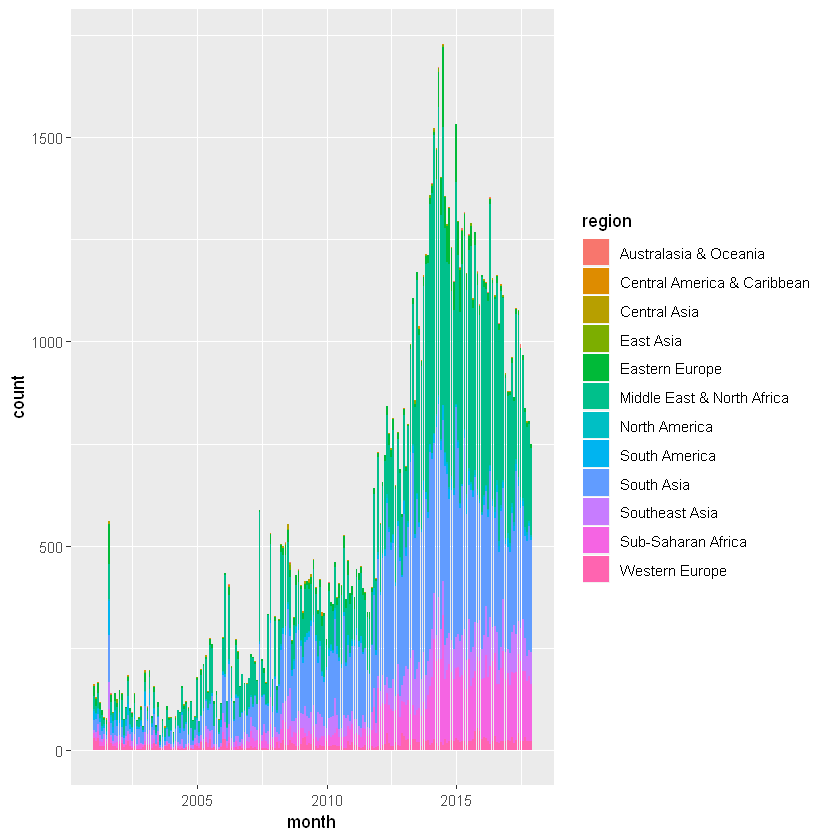

In [38]:
daily_terror <- terror_after_2001 %>% group_by(date) %>% summarize(n = n())
monthly_terror <- daily_terror %>% group_by(month = floor_date(date, "month")) %>% 
  summarize(n = sum(n))

head(monthly_terror)

terror_after_2001 %>% group_by(month = floor_date(date, "month")) %>% ggplot(aes(month, fill=region)) + geom_bar()

## Attacks per region with Attack-Type

### Attacks per year and region (filter: only 'Middle East & North Africa' and 'South Asia')

Warning message:
"Removed 119 rows containing non-finite values (stat_count)."

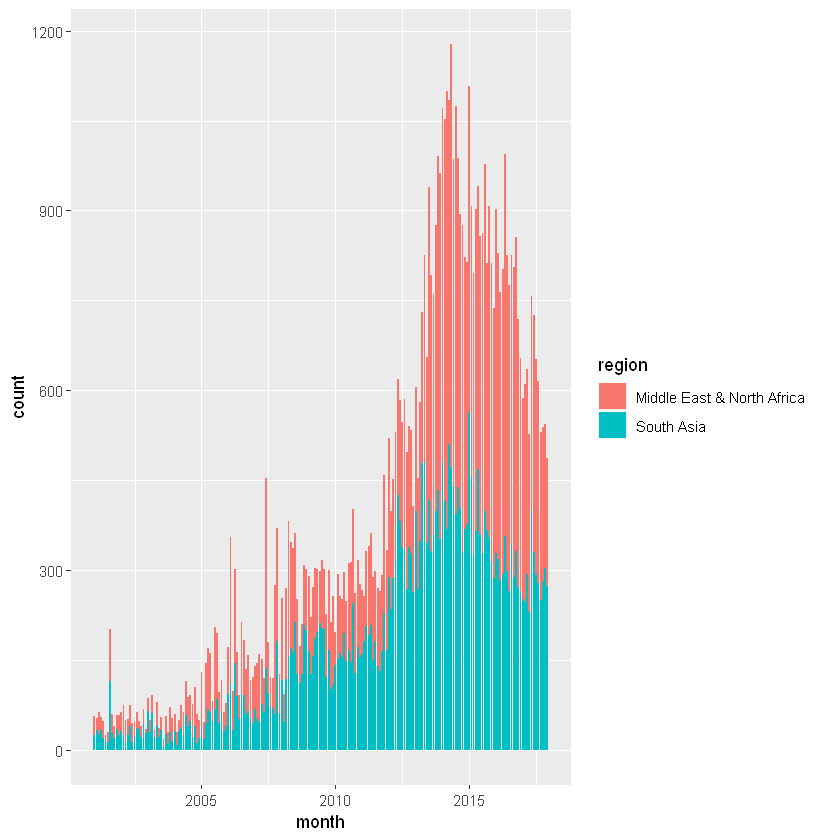

In [34]:
terror_me_na = terror_after_2001 %>% filter(region %in% c('Middle East & North Africa', 'South Asia'))
terror_me_na %>% group_by(month = floor_date(date, "month")) %>% ggplot(aes(month, fill=region)) + geom_bar()

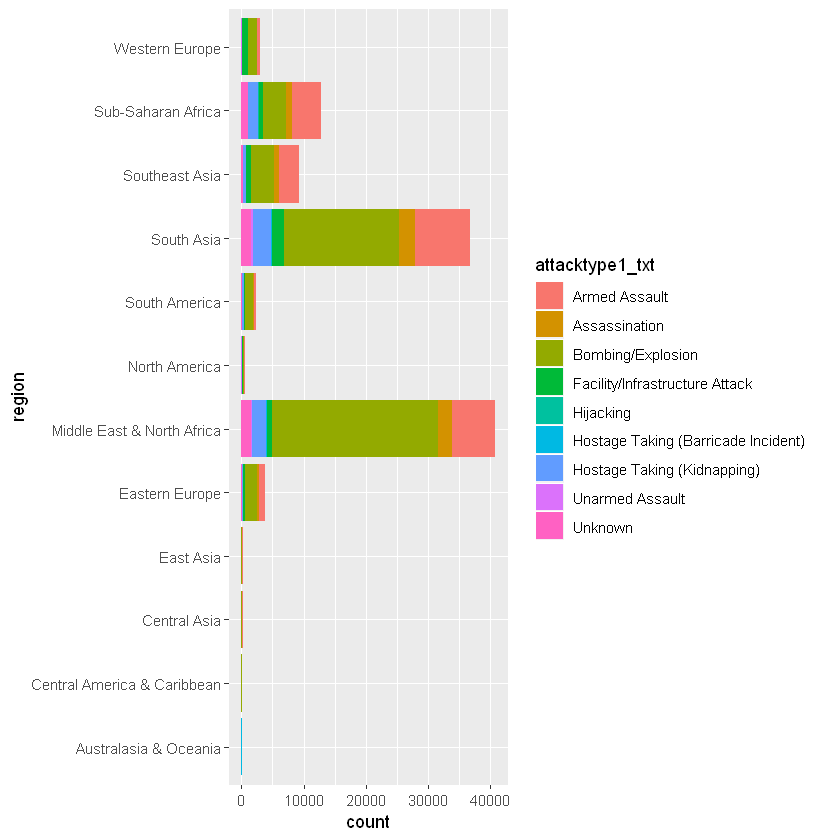

In [35]:
ggplot(terror_after_2001, aes(region)) + geom_bar(aes(fill=attacktype1_txt)) + coord_flip()

### Attacktype per month

Warning message:
"Removed 119 rows containing non-finite values (stat_count)."

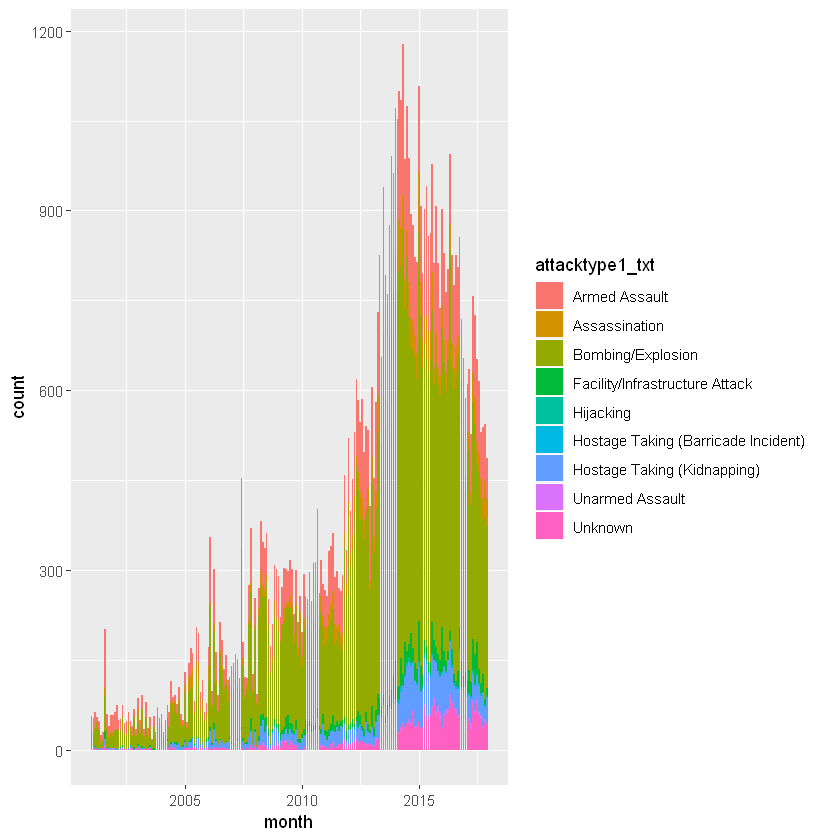

In [39]:
terror_me_na %>% group_by(month = floor_date(date, "month")) %>% ggplot(aes(month, fill=attacktype1_txt)) + geom_bar()

## Terror attacks from ISIL and Taliban

In [40]:
terror_isil_taliban <- terror_after_2001 %>% filter(gname %in% c('Islamic State of Iraq and the Levant (ISIL)', 'Taliban'))

In [41]:
head(terror_isil_taliban)

eventid,year,month,day,approxdate,extended,resolution,country_id,country,region_id,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date
200101070007,2001,1,7,,1,1/10/2001,4,Afghanistan,6,...,"""Taliban recapture central Afghan district,"" Agence France-Presse, January 8, 2001.","""Taleban killed hundreds of Afghans - reports,"" Reuters, February 19, 2001.","""Afghanistan - Taleban accused of mass killing,"" Pakistan Press International, February 19, 2001.",UMD Schmid 2012,0,0,0,0,,2001-01-07
200108170016,2001,8,17,,0,,4,Afghanistan,6,...,"“Mashhad radio: Taleban attack displaced people in central Afghanistan,” Voice of the Islamic Republic of Iran, August 18, 2001.","“Taliban set 400 farmers' tents on fire, steal cattle,"" IRNA, August 17, 2001.",,CETIS,0,0,0,0,,2001-08-17
200109100001,2001,9,10,,0,,4,Afghanistan,6,...,"Luke Harding, “Afghan Rebel Leader Blown Up in Assassination Attempt,” The Guardian, September 11, 2001.","""Camera Bomb Injures Leader,” The Herald Sun, September 10, 2001.",,CETIS,0,0,0,0,,2001-09-10
200109260002,2001,9,26,,0,,4,Afghanistan,6,...,"""Kabul Embassy Building Torched; NATO Meets on Terror,” Agence France Presse, September 26, 2001.","""Kabul Embassy Attacked, Taliban Say US Strike Threat Recedes,” Agence France Presse, September 26, 2001.","""US Embassy Compound Ablaze,” Hobart Mercury, September 27, 2001.",CETIS,0,1,1,1,,2001-09-26
200204130003,2002,4,13,,0,,4,Afghanistan,6,...,"Alexandre Peyrille, ""US troops attacked in Afghanistan, expect more clashes,"" Agence France Press, 04/15/2002.","Michelle Boorstein, ""US-led forces kill 'terrorists' as new battles erupt in Afghanistan,"" The Scotsman, 04/15/2002.","Michelle Boorstein, ""US troops shot at,"" The Gazette, 04/15/2002.",CETIS,0,1,1,1,,2002-04-13
200205020001,2002,5,2,,0,,4,Afghanistan,6,...,"""Afghanistan: Four Civilians Injured in Missile Attack on Khost Airport,” Peshawar Afghan Islamic Press in Pashto, May 2, 2002.","Sergei Artemiev, “US troops in Afghanistan Brought Under Missile Fire,” ITAR-TASS News Agency, May 3, 2002.","Alex Spillius, “Bin Laden's Men Fire Two Rockets at British Base,” The Daily Telegraph, May 3, 2002",CETIS,0,1,1,1,,2002-05-02


Warning message:
"Removed 9 rows containing non-finite values (stat_count)."Warning message:
"position_stack requires non-overlapping x intervals"

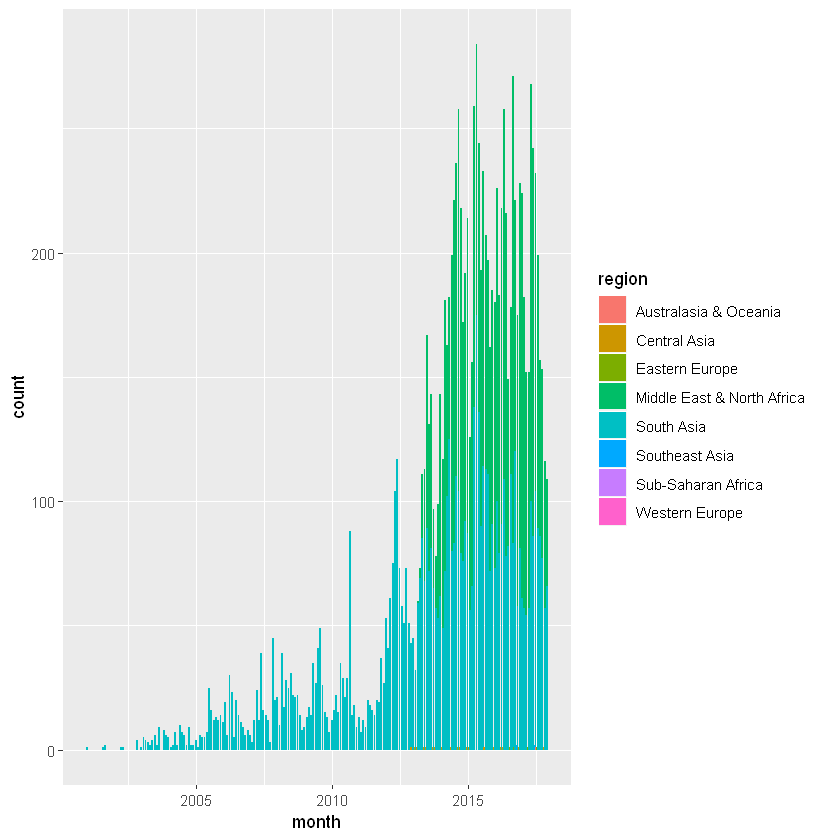

In [42]:
terror_isil_taliban %>% group_by(month = floor_date(date, "month")) %>% ggplot(aes(month, fill=region)) + geom_bar()

--> Most Terror attacks from ISIL and Taliban in Africa and South Asia

### Taliban / ISIL Attacks per year in Middle East & North Africa' and 'South Asia'

Warning message:
"Removed 9 rows containing non-finite values (stat_count)."

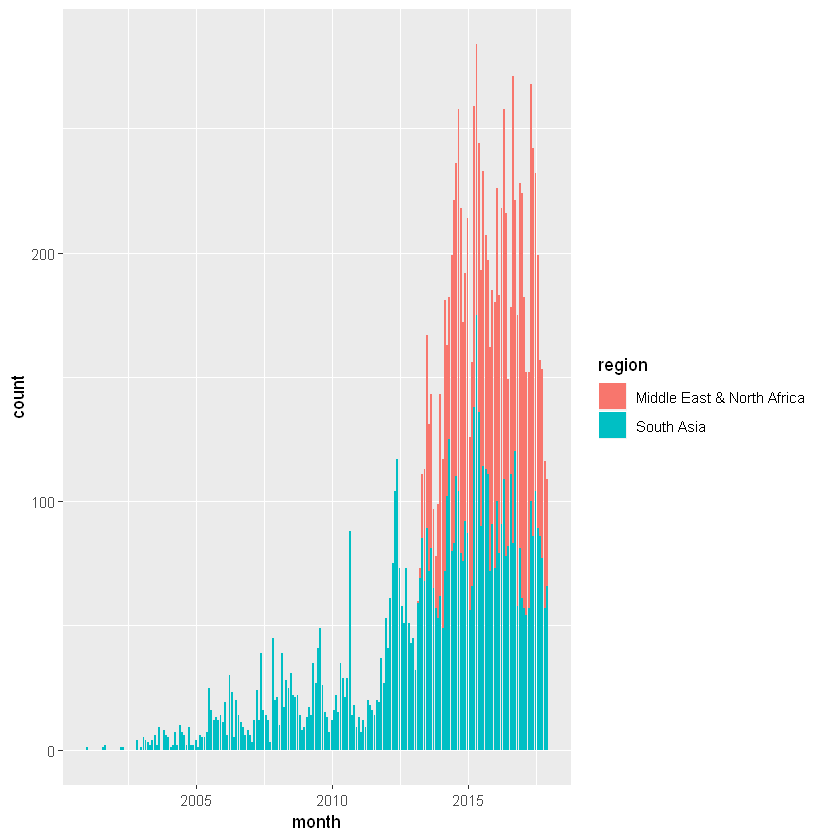

In [43]:
terror_isil_taliban_me_na_sa = terror_isil_taliban %>% filter(region %in% c('Middle East & North Africa', 'South Asia'))
terror_isil_taliban_me_na_sa %>% group_by(month = floor_date(date, "month")) %>% ggplot(aes(month, fill=region)) + geom_bar()

--> Taliban & ISIL almost exclusively active in Middle East & North Africa and South Asia  
--> A lot of new Attacks in Middle East & North Africa after ca. 2013

### Taliban / ISIL Attacktype

Warning message:
"Removed 9 rows containing non-finite values (stat_count)."Warning message:
"position_stack requires non-overlapping x intervals"

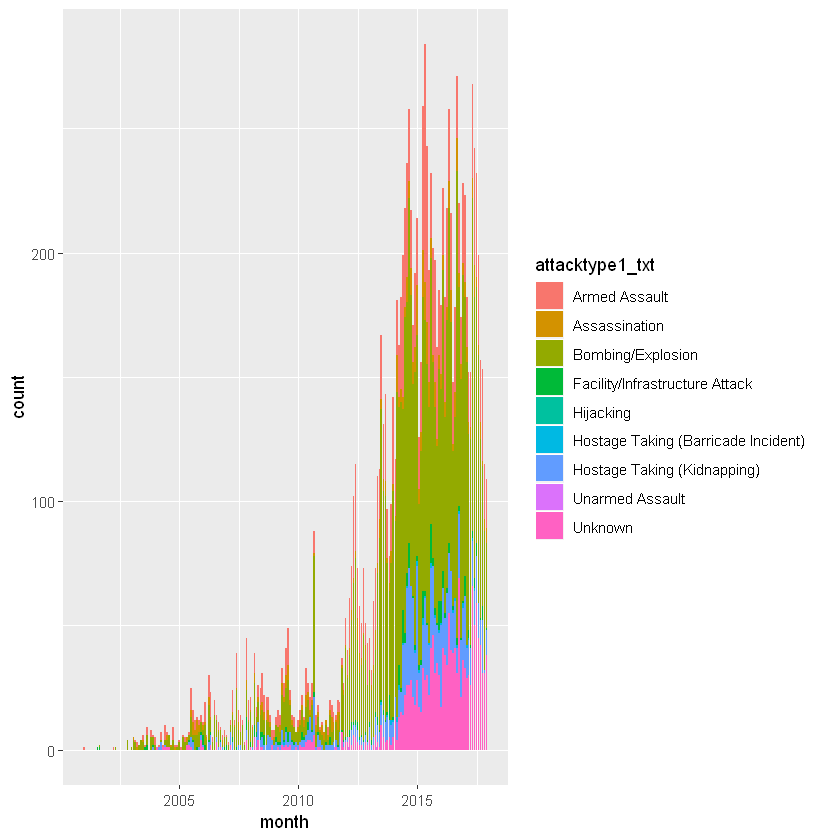

In [44]:
terror_isil_taliban_me_na_sa %>%
  group_by(month = floor_date(date, "month")) %>% 
  ggplot(aes(month, fill=attacktype1_txt)) + 
    geom_bar()

In [45]:
monthly_attacks <- terror_after_2001 %>%  
  group_by(month = floor_date(date, "month")) %>%
  summarise(attacks_per_month = n())
#terror_isil <- terror %>% filter(gname=='Islamic State of Iraq and the Levant (ISIL)')
terror_isil <- terror_after_2001 %>% filter(gname=='Taliban')
terror_isil_taliban_by_month <- terror_isil_taliban %>% group_by(month = floor_date(date, "month")) %>% summarize(attacks_per_month_isil_taliban = n())

In [47]:
head(monthly_attacks)
head(terror_isil_taliban_by_month)

month,attacks_per_month
2001-01-01,161
2001-02-01,129
2001-03-01,165
2001-04-01,117
2001-05-01,98
2001-06-01,80


month,attacks_per_month_isil_taliban
2001-01-01,1
2001-08-01,1
2001-09-01,2
2002-04-01,1
2002-05-01,1
2002-11-01,4


### Merge Yearly Attacks and Yearly Attacks by ISIL / Taliban

In [48]:
monthly_attacks_merged <- merge(x = monthly_attacks, y = terror_isil_taliban_by_month, by = "month", all.x = TRUE)
monthly_attacks_merged

month,attacks_per_month,attacks_per_month_isil_taliban
2001-01-01,161,1
2001-02-01,129,NA
2001-03-01,165,NA
2001-04-01,117,NA
2001-05-01,98,NA
2001-06-01,80,NA
2001-07-01,77,NA
2001-08-01,560,1
2001-09-01,139,2
2001-10-01,93,NA


Warning message:
"Removed 19 rows containing missing values (geom_point)."

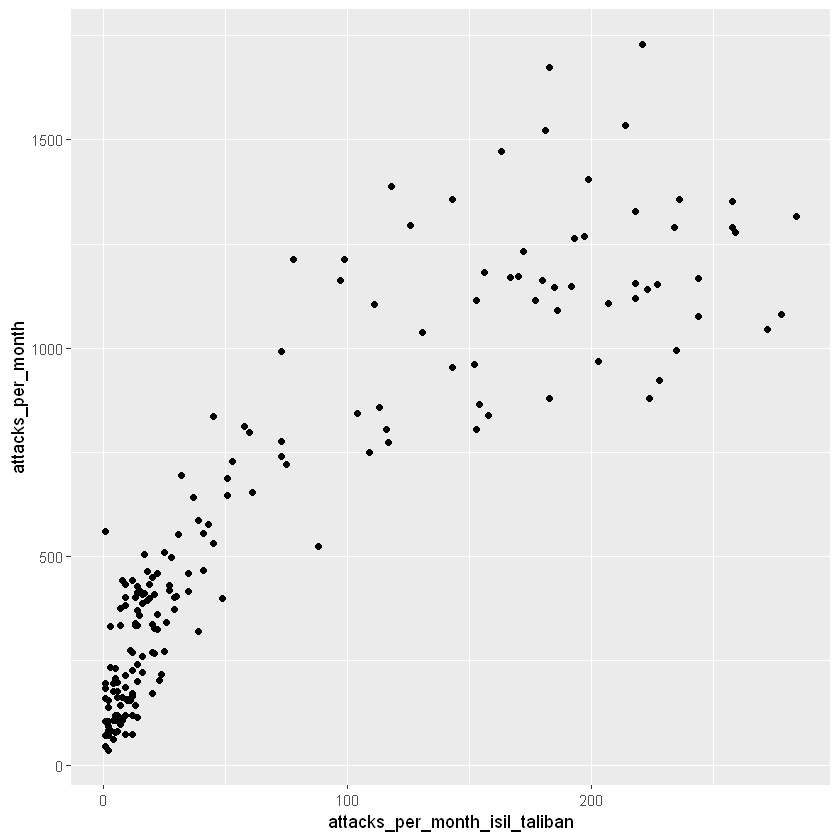

In [49]:
ggplot(monthly_attacks_merged, aes(attacks_per_month_isil_taliban, attacks_per_month)) + 
  geom_point()

## Create Model

In [50]:
mod_monthly_attacks = lm(attacks_per_month ~ attacks_per_month_isil_taliban, data = monthly_attacks_merged)
mod_monthly_attacks


Call:
lm(formula = attacks_per_month ~ attacks_per_month_isil_taliban, 
    data = monthly_attacks_merged)

Coefficients:
                   (Intercept)  attacks_per_month_isil_taliban  
                       249.263                           4.714  


## Add Predictions --> Predict Attacks per Year

In [51]:
grid <- monthly_attacks_merged %>% 
  data_grid(attacks_per_month_isil_taliban) %>% 
  add_predictions(mod_monthly_attacks)
grid

attacks_per_month_isil_taliban,pred
1,253.9768
2,258.6910
3,263.4051
4,268.1193
5,272.8334
6,277.5476
7,282.2617
8,286.9759
9,291.6901
10,296.4042


## Visualize model

Warning message:
"Removed 19 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

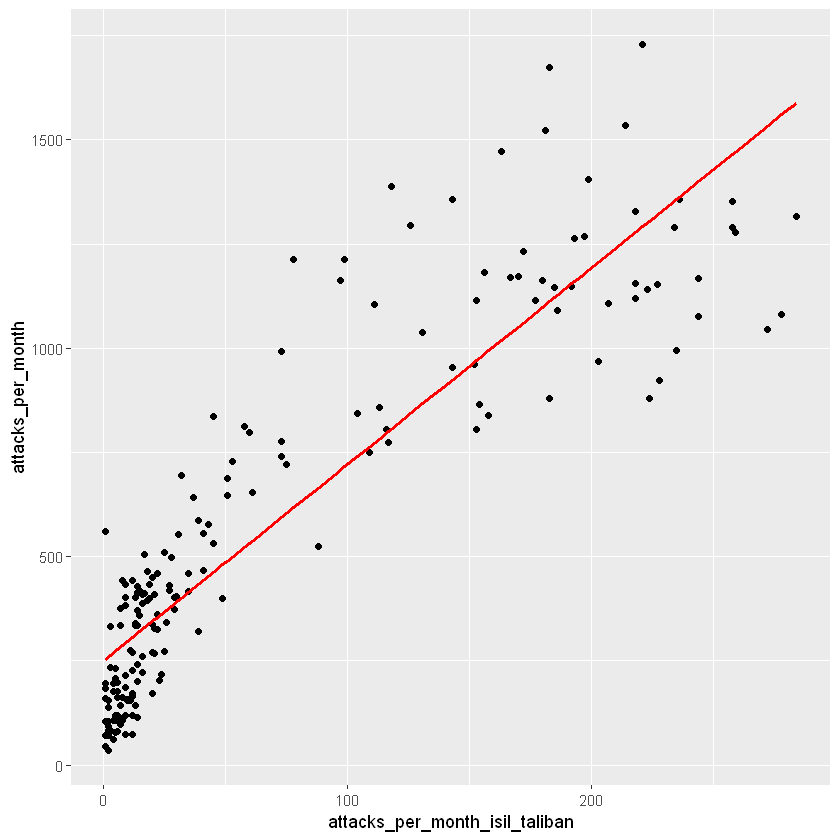

In [52]:
ggplot(monthly_attacks_merged, aes(attacks_per_month_isil_taliban)) + 
  geom_point(aes(y = attacks_per_month)) +
  geom_line(data = grid, aes(y = pred), colour = "red", size = 1)

## Show residuals from Model

In [53]:
grid <- monthly_attacks_merged %>% 
  add_residuals(mod_monthly_attacks)
grid

month,attacks_per_month,attacks_per_month_isil_taliban,resid
2001-01-01,161,1,-92.97681
2001-02-01,129,NA,NA
2001-03-01,165,NA,NA
2001-04-01,117,NA,NA
2001-05-01,98,NA,NA
2001-06-01,80,NA,NA
2001-07-01,77,NA,NA
2001-08-01,560,1,306.02319
2001-09-01,139,2,-119.69097
2001-10-01,93,NA,NA


`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 20 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 20 rows containing missing values (geom_point)."

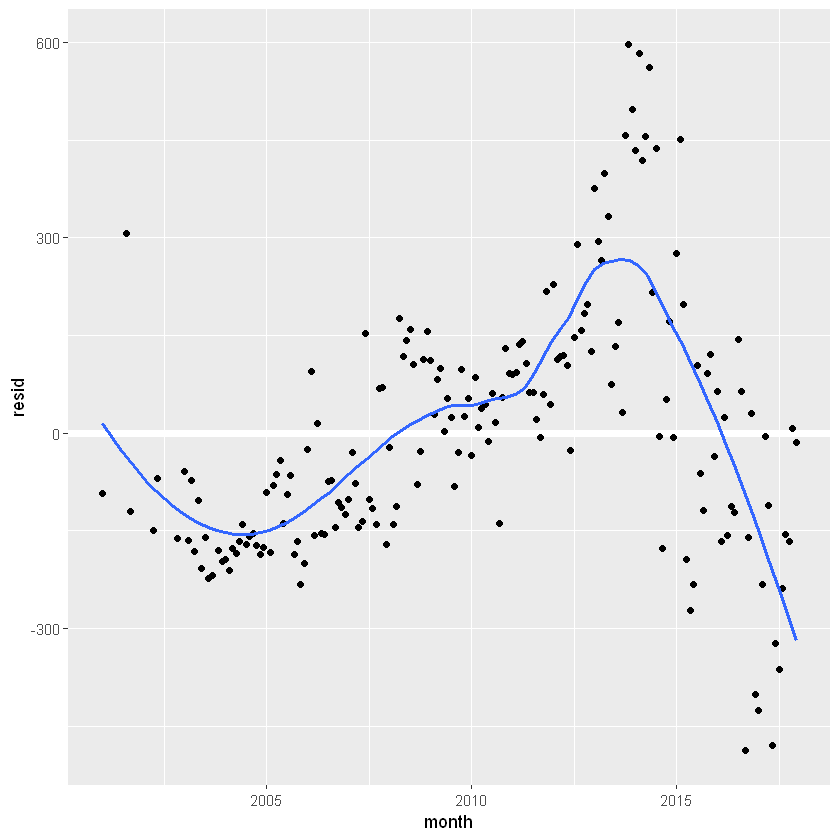

In [54]:
ggplot(grid, aes(month, resid)) + 
  geom_ref_line(h = 0) +
  geom_point() + 
  geom_smooth(se = FALSE, span = 0.5)

--> Model is quite bad because there are high residuals, which are not random.